### Milestone 4: Deep learning, due Wednesday, April 26, 2017

For this milestone you will (finally) use deep learning to predict movie genres. You will train one small network from scratch on the posters only, and compare this one to a pre-trained network that you finetune. [Here](https://keras.io/getting-started/faq/#how-can-i-use-pre-trained-models-in-keras) is a description of how to use pretrained models in Keras.

You can try different architectures, initializations, parameter settings, optimization methods, etc. Be adventurous and explore deep learning! It can be fun to combine the features learned by the deep learning model with a SVM, or incorporate meta data into your deep learning model. 

**Note:** Be mindful of the longer training times for deep models. Not only for training time, but also for the parameter tuning efforts. You need time to develop a feel for the different parameters and which settings work, which normalization you want to use, which model architecture you choose, etc. 

It is great that we have GPU's via AWS to speed up the actual computation time, but you need to be mindful of your AWS credits. The GPU instances are not cheap and can accumulate costs rather quickly. Think about your model first and do some quick dry runs with a larger learning rate or large batch size on your local machine. 

The notebook to submit this week should at least include:

- Complete description of the deep network you trained from scratch, including parameter settings, performance, features learned, etc. 
- Complete description of the pre-trained network that you fine tuned, including parameter settings, performance, features learned, etc. 
- Discussion of the results, how much improvement you gained with fine tuning, etc. 
- Discussion of at least one additional exploratory idea you pursued

# Milestone 4 submission
## Team 37 (Alexander Dubitskiy, Keenan Venuti, Timur Zambalayev)

Github repo link: https://github.com/adubitskiy/cs109b

##  Complete description of the deep network you trained from scratch, including parameter settings, performance, features learned, etc. 

Here is the link for the notebook: https://github.com/adubitskiy/cs109b/blob/master/model_custom_loss.ipynb

The data consisted of 58,825 movies. We reserved 10% for the test dataset (5,883 samples). The train set had 52,942 movies. 
When we did the train test split we used the stratify option to maintain the proportion of the classes across our splits.
During the fit we set aside 20% for validation (10,589 samples), so we trained on 42,353 samples.
The image sizes: 224x224x3 (rgb).

We used 4 convolution layers (with relu activation functions) and 2 fully conected layers regularized by the dropouts.
The loss function was weighted crossentropy. Batch size was 128.

First we did rough tuning using Nesterov Adam optimizer (optimizer = 'nadam'). We used early stopping (stop when vaidation loss is not going down for 5 epochs). The rough tuning lasted for 17 epochs (each epoch taking around 200 seconds).
The train loss went from 29.2 to 8.9. The validation loss - from 26.9 to 21.6.

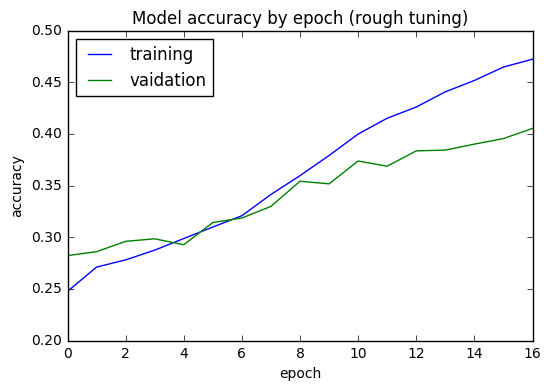

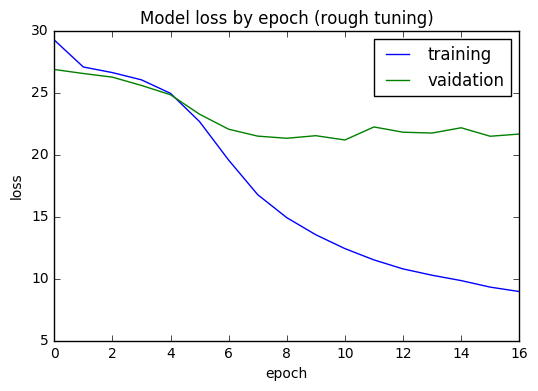

In [10]:
from IPython.display import Image, display

display(Image(filename='Milestone_4/m4_accuracy_rough_tuning.png'))
display(Image(filename='Milestone_4/m4_loss_rough_tuning.png'))

After that it was more precise tuning with a small step size (optimizer=SGD(lr = 0.0001, momentum=0.9)).
That took 7 additional epochs.

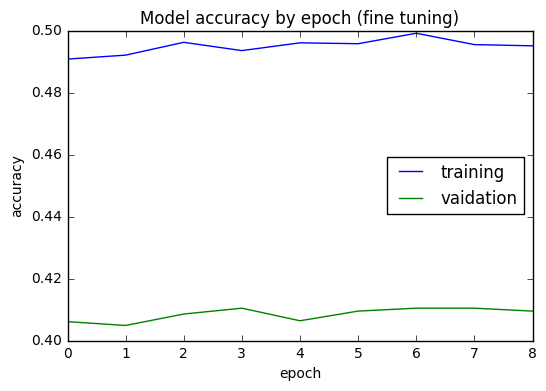

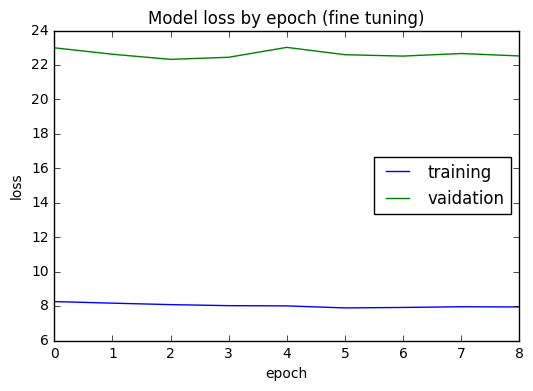

In [9]:
from IPython.display import Image, display

display(Image(filename='Milestone_4/m4_accuracy_fine_tuning.png'))
display(Image(filename='Milestone_4/m4_loss_fine_tuning.png'))

The classification report for the test set:

```
                 precision    recall  f1-score   support

         Action       0.82      0.25      0.38       646
      Adventure       0.95      0.44      0.60       332
      Animation       0.87      0.53      0.66       392
         Comedy       0.62      0.33      0.43      1513
          Crime       0.84      0.36      0.51       403
    Documentary       0.65      0.42      0.51       876
          Drama       0.59      0.36      0.44      2100
         Family       0.91      0.51      0.65       370
        Fantasy       0.98      0.56      0.71       208
        Foreign       0.98      0.50      0.66       195
        History       1.00      0.52      0.69       124
         Horror       0.79      0.39      0.52       501
          Music       0.85      0.53      0.65       411
        Mystery       0.97      0.46      0.63       206
        Romance       0.82      0.27      0.41       630
Science Fiction       0.95      0.48      0.64       276
       TV Movie       1.00      0.51      0.67       122
       Thriller       0.79      0.38      0.51       588
            War       0.98      0.50      0.67       113
        Western       0.90      0.56      0.69       142

    avg / total       0.76      0.39      0.51     10148
```

The result the average f1-score = 0.51. It's better than 0.37 we had in Milestone 3 (SGD classifier on text overview/cast/crew data) for the same movie set (59k samples).

## Complete description of the pre-trained network that you fine tuned, including parameter settings, performance, features learned, etc. 

The link to the executed notebook: https://github.com/adubitskiy/cs109b/blob/master/model_inception_v3.ipynb

For the pre-trained model we used the Inception v3 model (https://keras.io/applications/#inceptionv3).
We added a global spatial average pooling layer and a fully-connected layer (relu activation).
We trained only these added top layers. 


## Discussion of the results, how much improvement you gained with fine tuning, etc. 

Looking at our deep network from scratch, you can see from our visualizations, tuning greatly increased training set accuracy and more subtly increased validation set accuracy when rough tuning.  The rough tuning process, lasting 17 epochs greatly decreased loss and increased accuracy. We used a similar measure to know when to stop the iterative epoch process if small enough changes in model accuracy were occurring over 5 epochs. Training Loss fell from 8.26 to 7.949 with accuracy raising from 0.491 to 0.495 over 9 epochs (where it stopped early); validation set loss fell from 22.996 to 22.522 and accuracy increased from 0.407 to 0.41. It seems as though fine tuning did very little for model accuracy despite loss decreasing overall and accuracy increasing by the end, one can see in the visualizations that they are steady around their endpoints. However, despite the smaller effect of fine tuning, with rough tuning our model was able to reach a better average f1-score than in previous machine learning models.

In contrast, the deep network created from a pre-trained model didn't require the same tuning process. To begin, the entire model is multi-class, picking one class from many as opposed to our multi label model. After observing accuracy rates through training, we wanted to try a more accurate model that had simpler training goals (for the one genre, we chose the top rated genre via TMDB and IMDB associated with that movie). Instead of using a custom weighted cross entropy loss function, we used a categorical cross entropy provided through keras. We used Geoff Hinton's RMSpropr adaptive learning rate that, "divides the learning rate by an exponentially decaying average of squared gradients." To tune this model, we set up our epochs to end training once there was little improvement within 5 epochs. However, because this was a pre-trained model, we were only tuning the output layers which were added to fit the needs of our problem. Tuning these output layers, in our training set, we found a reduction from a loss of 15.405 to 6.236 and a gain in accuracy from 0.082 to 0.374 across 10 epochs. In our validation set, we found loss went from 14.751 to 12.696 with accuracy increasing from 0.07 to 0.282. After tuning the output layers, we saw it necessary to apply a similar epoch process to tune the top 2 inception blocks, this lasted 22 epochs. Here, in the training set, we saw a reduction in our loss function from 4.548 to 0.433 and an increase in accuracy from 0.4859 to 0.9461; in the validation set, we saw an increase in our loss from 10.573 to 13.14 and an increase in accuracy from 0.366 to 0.632.

##  Discussion of at least one additional exploratory idea you pursued

#### Multi-class classification with vgg16

The link to the notebook: https://github.com/adubitskiy/cs109b/blob/master/Milestone_4/three_models.ipynb

We also did some experiments with multi-class classification using three different models:
1) Small convnet from scratch
2) vgg16 + fully-connected block
3) vgg16 + convolution block + fully-connected block

As a pre-trained model we used vgg16: https://keras.io/applications/#vgg16

The dataset was smaller (4k) with 4 major genres (we assigned a single genre this way - we started from a most dominant genre (Drama) and assigned Drama to all movies that had Drama among its genres; then we did the same thing for the second most dominant genre (Comedy), etc). 

The "vgg16 + fully-connected block" model had the best result (avg f1-score of 0.347). 
"Small convnet from scratch" model had 0.224. 
"vgg16 + convolution block + fully-connected block" - 0.219.

In addition to our image based models, we attempted to create a simple neural network using overview data in a multi-label model (link to the notebook is here: https://github.com/adubitskiy/cs109b/blob/master/Milestone_4/NN_text_basic.ipynb ). This model learned based on vectors of word utilization used across all relevant words in the dataset and associated with a label indicating which genres it was a part of. This model is most similar to the SGD-SVM and Random Forest model used on the previous milestone. However, we found that accuracy of the model became relatively stable after 50 epochs and yielded an unimpressive .338 test accuracy (pretty much the same as our machine learning models). This could be because we are dealing with the same dataset as was used for our machine learning models or the neural network could require further tuning or layer analysis.